In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Данные представляют собой список покупателей с информацией он поле, возросту, годовому доходу и оценки расходов.
Преверим нет ли неопределенных значений

In [2]:
data.isna().any()

Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

#**Предобработка данных**

Для начала переименуем для удобства колонки

In [3]:
data.rename(columns={'Genre':'Gender',
                     'Annual Income (k$)':'Annual_Income',
                     'Spending Score (1-100)':'Spending_Score'},
                      inplace=True)

Посмотрим соотношение мужчин и женщин

Text(0.5, 1.0, 'Распределение полов')

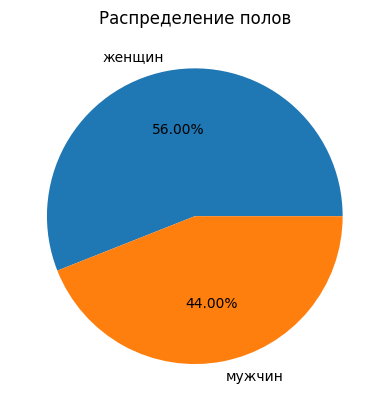

In [4]:
gender_count = data['Gender'].value_counts(normalize=True)
plt.pie(gender_count.values , autopct= '%.2f%%' ,labels= ["женщин", "мужчин"])
plt.title("Распределение полов")

# Визуализация данных

Визуализируем данные по парам параметров для определение оптимальных параметров для кластеризации

<Figure size 1200x600 with 0 Axes>

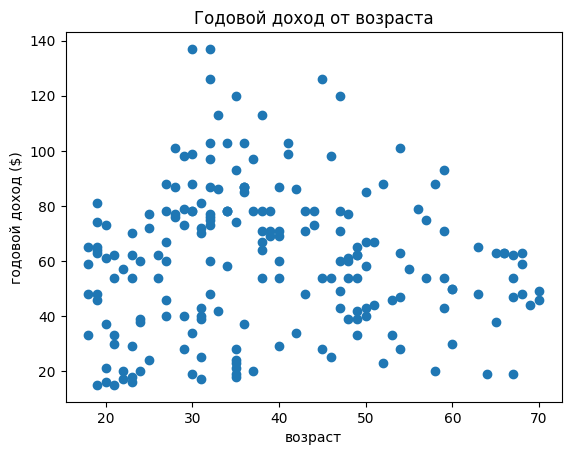

<Figure size 1200x600 with 0 Axes>

In [5]:
plt.title('Годовой доход от возраста', fontsize = 12)
plt.ylabel('годовой доход ($)')
plt.xlabel('возраст')
plt.scatter(data['Age'],data['Annual_Income'])
plt.figure(figsize=(12,6))


<Figure size 1200x600 with 0 Axes>

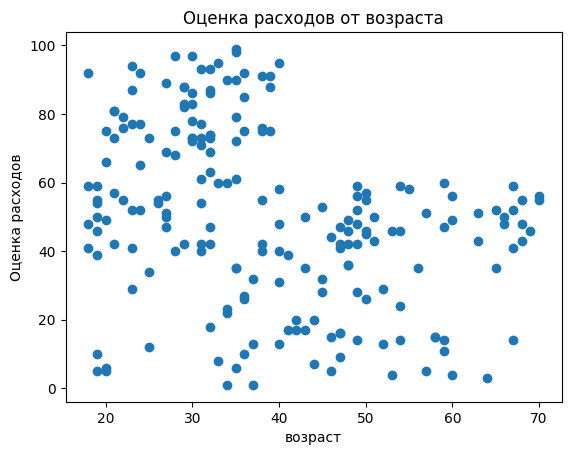

<Figure size 1200x600 with 0 Axes>

In [6]:
plt.title('Оценка расходов от возраста', fontsize = 12)
plt.ylabel('Оценка расходов')
plt.xlabel('возраст')
plt.scatter(data['Age'],data['Spending_Score'])
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

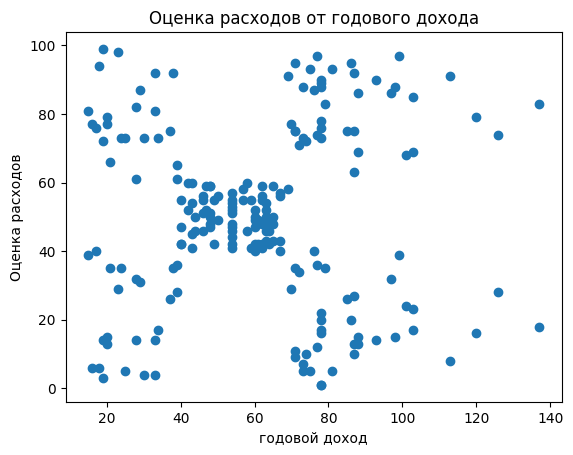

<Figure size 1200x600 with 0 Axes>

In [7]:
plt.title('Оценка расходов от годового дохода', fontsize = 12)
plt.ylabel('Оценка расходов')
plt.xlabel('годовой доход')
plt.scatter(data['Annual_Income'],data['Spending_Score'])
plt.figure(figsize=(12,6))

Данная пара параметров подходит для кластеризации, так как значение можно визуально сгруппировать

# **подготовка данных к кластеризации**

Скалирование данных

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age','Annual_Income','Spending_Score']] = scaler.fit_transform(data[['Age','Annual_Income','Spending_Score']])

data.head()

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980


Текстовые данные колонки Gender можно заменить на "0" и "1" с помощью кодирования

In [9]:
from sklearn.preprocessing import  LabelEncoder

label_encode = LabelEncoder()
data.Gender = label_encode.fit_transform(data.Gender)
data

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,1,-1.424569,-1.738999,-0.434801
2,1,-1.281035,-1.738999,1.195704
3,0,-1.352802,-1.700830,-1.715913
4,0,-1.137502,-1.700830,1.040418
5,0,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,0,-0.276302,2.268791,1.118061
197,0,0.441365,2.497807,-0.861839
198,1,-0.491602,2.497807,0.923953


Text(0.5, 0, 'количество кластеров')

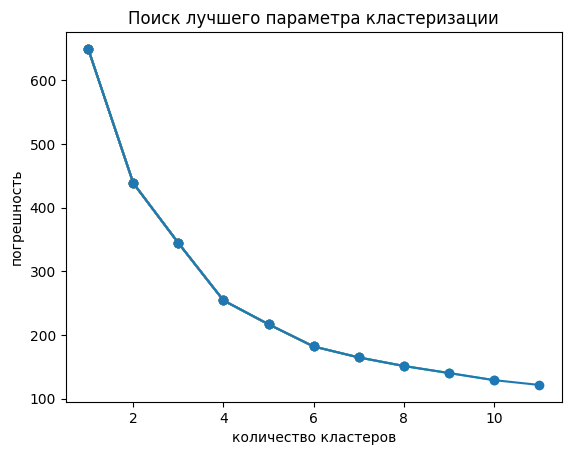

In [10]:
from sklearn.cluster import KMeans

loss = [] #пустой масив погрешностей
cluster_num = [] #пустой количества кластеров

for i in range(1,12):
 model_k_means = KMeans(n_clusters= i, n_init = 10)
 cluster_num.append(i) #добавление количества кластеров в масив
 model_k_means.fit(data)
 loss.append(model_k_means.inertia_) #добавление погресности в масив

 plt.plot(cluster_num , loss , marker = 'o')
plt.title('Поиск лучшего параметра кластеризации')
plt.ylabel('погрешность')
plt.xlabel('количество кластеров')

Зависимость линейная. Начиная с 5 кластеров погрештость приемлимая

Теперь изучим зависимость коэффициента контура от количества кластеров

Text(0, 0.5, 'Коэффициент контура')

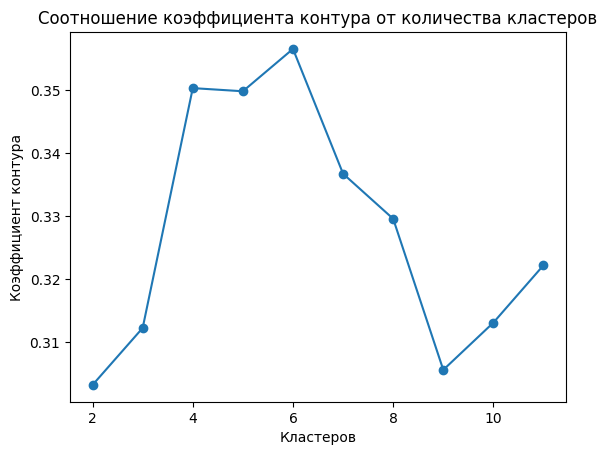

In [11]:
from sklearn.metrics import silhouette_score

k_with_score = {} #создаем пустой фрейм для записи Коэффициентов контура
for k in range(2,12):
    model_k_means = KMeans(n_clusters=k, random_state=45, n_init = 10)
    model_k_means.fit(data)
    k_with_score[k] = silhouette_score(data, model_k_means.labels_)

#визуализация соотношения
plt.plot(k_with_score.keys() , k_with_score.values(), marker = 'o')
plt.title('Соотношение коэффициента контура от количества кластеров')
plt.xlabel('Кластеров')
plt.ylabel('Коэффициент контура')

Оптимальное значение кластеров 5-6


# **Кластеризация k_means**


In [12]:
model_k_means = KMeans(n_clusters= 5, n_init = 30)
model_k_means.fit(data)
data['cluster'] = model_k_means.labels_ #Добавление к записям колонки с номером кластера
data

,Gender,Age,Annual_Income,Spending_Score,cluster
CustomerID,,,,,
1,1,-1.424569,-1.738999,-0.434801,2
2,1,-1.281035,-1.738999,1.195704,4
3,0,-1.352802,-1.700830,-1.715913,2
4,0,-1.137502,-1.700830,1.040418,4
5,0,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...,...
196,0,-0.276302,2.268791,1.118061,1
197,0,0.441365,2.497807,-0.861839,3
198,1,-0.491602,2.497807,0.923953,1


In [13]:
#заспределение данных по 5 фреймам в соответствии с кластером
clutser0 = data[ data['cluster'] == 0]
clutser1 = data[ data['cluster'] == 1]
clutser2 = data[ data['cluster'] == 2]
clutser3 = data[ data['cluster'] == 3]
clutser4 = data[ data['cluster'] == 4]

визуализация данных с учетом кластеризации

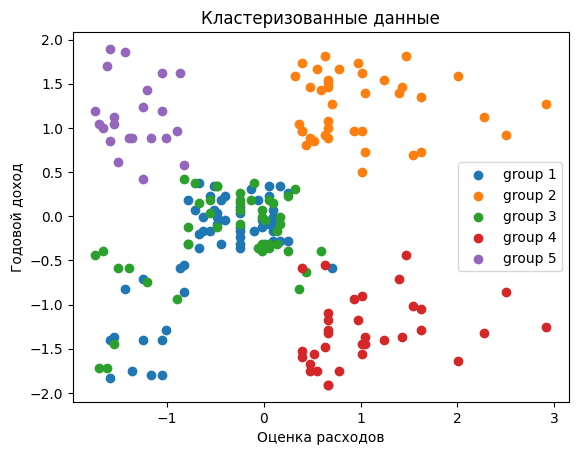

In [14]:
plt.scatter(clutser0['Annual_Income'], clutser0['Spending_Score'] ,label = 'group 1')
plt.scatter(clutser1['Annual_Income'], clutser1['Spending_Score'] ,label = 'group 2')
plt.scatter(clutser2['Annual_Income'], clutser2['Spending_Score'] ,label = 'group 3')
plt.scatter(clutser3['Annual_Income'], clutser3['Spending_Score'] ,label = 'group 4')
plt.scatter(clutser4['Annual_Income'], clutser4['Spending_Score'] ,label = 'group 5')

plt.title('Кластеризованные данные')
plt.ylabel('Годовой доход')
plt.xlabel('Оценка расходов')

plt.legend()
plt.show()

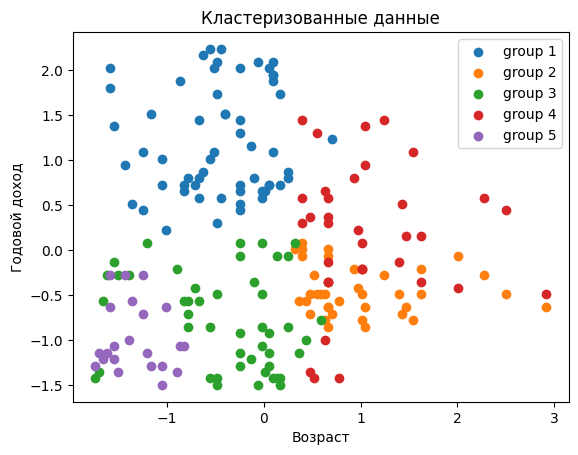

In [15]:
plt.scatter(clutser0['Annual_Income'], clutser0['Age'] ,label = 'group 1')
plt.scatter(clutser1['Annual_Income'], clutser1['Age'] ,label = 'group 2')
plt.scatter(clutser2['Annual_Income'], clutser2['Age'] ,label = 'group 3')
plt.scatter(clutser3['Annual_Income'], clutser3['Age'] ,label = 'group 4')
plt.scatter(clutser4['Annual_Income'], clutser4['Age'] ,label = 'group 5')

plt.title('Кластеризованные данные')
plt.ylabel('Годовой доход')
plt.xlabel('Возраст')

plt.legend()
plt.show()